# OOI Pioneer Profiler Moorings

Taking [OOI Pioneer array data](https://dataexplorer.oceanobservatories.org) and wiriting it in [`profiles`](https://mitgcm.readthedocs.io/en/latest/ocean_state_est/ocean_state_est.html#profiles-model-data-comparisons-at-observed-locations) package format.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import xmitgcm

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

## Load OOI DataSets

In [17]:
def readOOI (fname):
    ds = xr.open_dataset(fname)
    ds = ds.rename({    'row':'iPROF', 
                        'z':'prof_depth',
                        'sea_water_temperature_profiler_depth_enabled': 'prof_T',
                        'sea_water_temperature_profiler_depth_enabled_qc_agg':'prof_Tflag',
                        'sea_water_practical_salinity_profiler_depth_enabled': 'prof_S',
                        'sea_water_practical_salinity_profiler_depth_enabled_qc_agg':'prof_Sflag',})\
            .drop({     'sea_water_density_profiler_depth_enabled',
                        'sea_water_density_profiler_depth_enabled_qc_agg',
                        'sea_water_pressure_profiler_depth_enabled',
                        'sea_water_pressure_profiler_depth_enabled_qc_agg',})
    return ds

In [18]:
dataPath = '/scratch2/shared/ooi-pioneer/'
dataFiles = os.listdir(dataPath)[5:]

In [19]:
ds = {}
for file in dataFiles:
    ds[file[0 : file.index('.')]] = readOOI(dataPath + file)

In [34]:
dsTest = ds['cp04ospm']
dsTest.time[0].values

numpy.datetime64('2014-04-15T20:00:00.000000000')

In [36]:
import matplotlib.dates as dates

dates.get_epoch()

'1970-01-01T00:00:00'

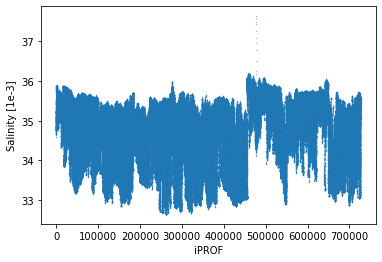

In [28]:
ds['cp01cnpm'].prof_S.plot(x='iPROF',
                              marker='o', linewidth=0.,
                              markersize=0.2)

## Write iPROFs

In [16]:
ts = dict(prof_T = (['iPROF'], ds['cp04ospm']['sea_water_temperature_profiler_depth_enabled']),
          prof_Tflag = (['iPROF'], ds['cp04ospm']['sea_water_temperature_profiler_depth_enabled_qc_agg']),
          prof_S = (['iPROF'], ds['cp04ospm']['sea_water_practical_salinity_profiler_depth_enabled']),
          prof_Sflag = (['iPROF'], ds['cp04ospm']['sea_water_practical_salinity_profiler_depth_enabled_qc_agg']),
         )

In [17]:
ds2

<xarray.Dataset>
Dimensions:     (iPROF: 3978245)
Dimensions without coordinates: iPROF
Data variables:
    prof_T      (iPROF) float64 12.08 12.01 12.09 11.92 ... 6.838 6.685 6.675
    prof_Tflag  (iPROF) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    prof_S      (iPROF) float64 35.08 35.05 35.09 35.0 ... 35.12 35.11 35.11
    prof_Sflag  (iPROF) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    description:  totally a test